In [1]:
import pandas as pd

### Defining a function for reading files by year

In [2]:

def parse_dataset(year) :
    filepath = f'../data/yob{year}.txt'
    df = pd.read_csv(filepath,names = ['Names','Gender','Frequency'])
    return df
    

In [3]:
parse_dataset(1880)

,Names,Gender,Frequency
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


# Inspecting Data with Pandas

### Reading Data

In [4]:
df_2000 = pd.read_csv('../data/yob2000.txt')

### Display the DataFrame


In [5]:
df_2000

,Emily,F,25957
0,Hannah,F,23085
1,Madison,F,19968
2,Ashley,F,17997
3,Sarah,F,17708
4,Alexis,F,17631
...,...,...,...
29770,Zeph,M,5
29771,Zeven,M,5
29772,Ziggy,M,5
29773,Zo,M,5


### Display the first 5 rows 

In [6]:
df_2000.head()

,Emily,F,25957
0,Hannah,F,23085
1,Madison,F,19968
2,Ashley,F,17997
3,Sarah,F,17708
4,Alexis,F,17631


### Display the last 5 rows

In [7]:
df_2000.tail()

,Emily,F,25957
29770,Zeph,M,5
29771,Zeven,M,5
29772,Ziggy,M,5
29773,Zo,M,5
29774,Zyier,M,5


### Display the number of rows and columns

In [8]:
df_2000.shape

(29775, 3)

### List column names

In [9]:
df_2000.columns

Index(['Emily', 'F', '25957'], dtype='object')

### List row index

In [10]:
df_2000.index

RangeIndex(start=0, stop=29775, step=1)

### Display column types

In [11]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29775 entries, 0 to 29774
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Emily   29775 non-null  object
 1   F       29775 non-null  object
 2   25957   29775 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 698.0+ KB


# Selecting rows and columns
### Read in data:

In [12]:
df = pd.read_csv('../data/yob1880.txt', index_col=0,names = ['Names','Gender','Freq'])

df

,Gender,Freq
Names,,
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
...,...,...
Woodie,M,5
Worthy,M,5
Wright,M,5


### Display 'frequency' column

In [13]:
df[["Freq"]]

,Freq
Names,
Mary,7065
Anna,2604
Emma,2003
Elizabeth,1939
Minnie,1746
...,...
Woodie,5
Worthy,5
Wright,5


### Display 'gender' and 'frequency' columns

In [14]:
df[["Gender","Freq"]]

,Gender,Freq
Names,,
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
...,...,...
Woodie,M,5
Worthy,M,5
Wright,M,5


### Display data for row(s) containing William

In [15]:
df.loc["William"]

,Gender,Freq
Names,,
William,F,30
William,M,9532


### Display data for all rows with William, Paul, and Anne

In [16]:
df.loc[["William","Paul","Anne"],:]

,Gender,Freq
Names,,
William,F,30
William,M,9532
Paul,M,301
Anne,F,136


### Display 'frequency' column for William, Paul, and Anne

In [17]:
df.loc[["William","Paul","Anne"],['Freq']]

,Freq
Names,
William,30
William,9532
Paul,301
Anne,136


### Display both columns for every second name

In [18]:
df[1::2]

,Gender,Freq
Names,,
Anna,F,2604
Elizabeth,F,1939
Margaret,F,1578
Alice,F,1414
Sarah,F,1288
...,...,...
Vann,M,5
Winston,M,5
Woodie,M,5




### Total number of babies in 2020

In [19]:
babies_2020 = parse_dataset(2020)

babies_2020["Frequency"].sum()

3327419

### Do the same for 1950 and compare the results

In [20]:
babies_1950 = parse_dataset(1950)

babies_1950["Frequency"].sum()

3503444

### Code to combine all the year datasets for analysis

In [21]:
df = pd.DataFrame(columns=['Names','Gender','Frequency'])

df

,Names,Gender,Frequency


In [22]:
for year in range(1880,2021) :
    df_temp=parse_dataset(year)
    df_temp['Year']=year
    df = pd.concat([df,df_temp])
    
    
df['Year'] = df['Year'].astype('int64')

### Displaying new DataFrame after concatenation 

In [23]:
df

,Names,Gender,Frequency,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31448,Zykell,M,5,2020
31449,Zylus,M,5,2020
31450,Zymari,M,5,2020
31451,Zyn,M,5,2020


### Saving the dataframe as CSV file

In [24]:
df.to_csv('../data/baby_names_all_years.csv', index=False)

### Using the combined DataFrame and the method .sort_values() figure out which name had the all time highest frequency and in which year.

In [25]:
df.sort_values(by=['Frequency'],ascending=False)

,Names,Gender,Frequency,Year
0,Linda,F,99693,1947
0,Linda,F,96212,1948
6104,James,M,94762,1947
7014,Michael,M,92723,1957
6105,Robert,M,91651,1947
...,...,...,...,...
8891,Kathlynn,F,5,1971
8892,Kathrene,F,5,1971
8893,Kathyrne,F,5,1971
8894,Katrell,F,5,1971


### Function for inputting start and end year to parse dataset for the specific years and saving it locally.

In [26]:
def parse_specific_year(start_year,end_year) :
    
    sy_df = pd.DataFrame(columns=['Names','Gender','Frequency'])

    for year in range(start_year,end_year) :
        df_temp=parse_dataset(year)
        df_temp['Year']=year
        sy_df = pd.concat([sy_df,df_temp])
        sy_df['Year'] = sy_df['Year'].astype('int64')
    sy_df.to_csv(f'../data/baby_names_{start_year}_{end_year}.csv', index=False)
    return sy_df

df_test = parse_specific_year(1880,1890)
df_test

,Names,Gender,Frequency,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2585,Weldon,M,5,1889
2586,Wendell,M,5,1889
2587,Wilhelm,M,5,1889
2588,Zeke,M,5,1889


## FILTERING DATAFRAMES

### Read in data:
```df = pd.read_csv('../data/baby_names_all_years.csv')```


In [27]:
df = pd.read_csv('../data/baby_names_all_years.csv')

### Boolean mask for the name 'Martin'

In [28]:
boolean_mask = (df["Names"] == "Martin")
boolean_mask 

0          False
1          False
2          False
3          False
4          False
           ...  
2021239    False
2021240    False
2021241    False
2021242    False
2021243    False
Name: Names, Length: 2021244, dtype: bool

###  Using boolean mask to display a DataFrame which only has babies names 'Martin'. 

In [29]:
df[boolean_mask]

,Names,Gender,Frequency,Year
986,Martin,M,357,1880
2983,Martin,M,327,1881
5009,Martin,M,387,1882
7160,Martin,M,377,1883
9365,Martin,M,385,1884
...,...,...,...,...
1878941,Martin,M,1396,2016
1911563,Martin,M,1282,2017
1943908,Martin,M,1295,2018
1975970,Martin,M,1248,2019


In [30]:
df_martin=df[boolean_mask]

### How many entries are the in the 'Martin' DataFrame? How many years are in the DataFrame? In how many years does the name 'Martin' appear for both genders?

In [31]:
len(df_martin)

241

In [32]:
df_martin['Year'].nunique()

141

In [33]:
df_martin_M = df_martin[df_martin["Gender"]== "M"]

df_martin_M

,Names,Gender,Frequency,Year
986,Martin,M,357,1880
2983,Martin,M,327,1881
5009,Martin,M,387,1882
7160,Martin,M,377,1883
9365,Martin,M,385,1884
...,...,...,...,...
1878941,Martin,M,1396,2016
1911563,Martin,M,1282,2017
1943908,Martin,M,1295,2018
1975970,Martin,M,1248,2019


In [34]:
df_martin_F = df_martin[df_martin["Gender"]== "F"]

df_martin_F

,Names,Gender,Frequency,Year
16374,Martin,F,5,1887
24201,Martin,F,5,1890
47416,Martin,F,7,1898
57846,Martin,F,5,1901
78725,Martin,F,6,1907
...,...,...,...,...
1406182,Martin,F,7,2002
1499466,Martin,F,8,2005
1538463,Martin,F,5,2006
1570371,Martin,F,6,2007


In [35]:
(df_martin_F["Year"]).isin(df_martin_M["Year"]).sum()

100

### Filter the combined DataFrame for a DataFrame which only has names that have a frequency over 2000

In [36]:
df[df["Frequency"] > 2000]

,Names,Gender,Frequency,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
942,John,M,9655,1880
943,William,M,9532,1880
...,...,...,...,...
2007425,Atlas,M,2049,2020
2007426,Miguel,M,2047,2020
2007427,Messiah,M,2025,2020
2007428,Tucker,M,2008,2020


### Filter combined DataFrame for a DataFrame which only has names that have a frequency over 2000 and for years starting with 2000 and grouping to find out the most common name since 2000

In [37]:
df[(df["Frequency"] > 2000) & (df["Year"] >= 2000)].groupby("Names").agg({"Frequency":"sum"}).sort_values("Frequency",ascending=False)

,Frequency
Names,
Jacob,446229
Michael,405318
Emma,391825
William,366729
Ethan,360279
...,...
Jayceon,2013
Matias,2013
Elliana,2011


The name Jacob is the most common used name since 2000

### 7. Filtering combined DataFrame for a DataFrame which only has names that have a frequency over 2000, for years starting with 2000 and for only females. What is the most common name given to females since 2000?

In [38]:
df[(df["Frequency"] > 2000) & (df["Year"] >= 2000) & (df["Gender"] == "F")].groupby("Names").agg({"Frequency":"sum"}).sort_values("Frequency",ascending=False)

,Frequency
Names,
Emma,391825
Olivia,358026
Emily,348140
Isabella,332037
Sophia,313221
...,...
Cynthia,2038
Ayla,2022
Ryleigh,2018


The name Emma is the most common name given to females since 2000

### Percentage of names that have a frequency larger than 100?

In [39]:
count_pg100 = len(df[df["Frequency"] > 100])

count_total = len(df)

pg_100 = (count_pg100/(count_pg100 + count_total))*100

print(round(pg_100,2),"%")

10.65 %


### Usage of name "Barack" over the years

In [40]:
df_barack = df[df["Names"] == "Barack"]

df_barack

,Names,Gender,Frequency,Year
1586668,Barack,M,5,2007
1611401,Barack,M,52,2008
1645750,Barack,M,71,2009
1681849,Barack,M,28,2010
1717659,Barack,M,15,2011
1751338,Barack,M,16,2012
1786415,Barack,M,11,2013
1819727,Barack,M,11,2014
1854613,Barack,M,8,2015
1883647,Barack,M,19,2016


# Visualize the Names Dataset
### Create the data

In [41]:
births_dict = {'year':[], 'total_births':[]}

In [42]:
for year in range(1880,2021):
    data_year = parse_dataset(year)
    year_sum = data_year["Frequency"].sum()
    births_dict['total_births'].append(year_sum)
    births_dict['year'].append(year)


births_dict


{'year': [1880,
  1881,
  1882,
  1883,
  1884,
  1885,
  1886,
  1887,
  1888,
  1889,
  1890,
  1891,
  1892,
  1893,
  1894,
  1895,
  1896,
  1897,
  1898,
  1899,
  1900,
  1901,
  1902,
  1903,
  1904,
  1905,
  1906,
  1907,
  1908,
  1909,
  1910,
  1911,
  1912,
  1913,
  1914,
  1915,
  1916,
  1917,
  1918,
  1919,
  1920,
  1921,
  1922,
  1923,
  1924,
  1925,
  1926,
  1927,
  1928,
  1929,
  1930,
  1931,
  1932,
  1933,
  1934,
  1935,
  1936,
  1937,
  1938,
  1939,
  1940,
  1941,
  1942,
  1943,
  1944,
  1945,
  1946,
  1947,
  1948,
  1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,


In [43]:
births_dict = pd.DataFrame(births_dict)


births_dict.set_index("year",inplace=True)


births_dict


,total_births
year,
1880,201484
1881,192690
1882,221533
1883,216944
1884,243461
...,...
2016,3663887
2017,3570234
2018,3508655


### Plotting using Panda

<Axes: xlabel='year'>

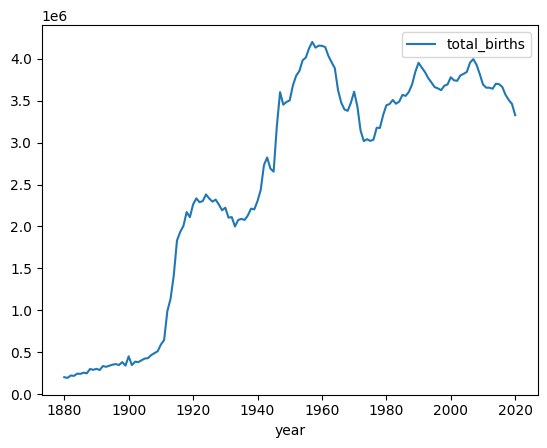

In [44]:
births_dict.plot()

### Plotting using Matplotlib (Line Plot)

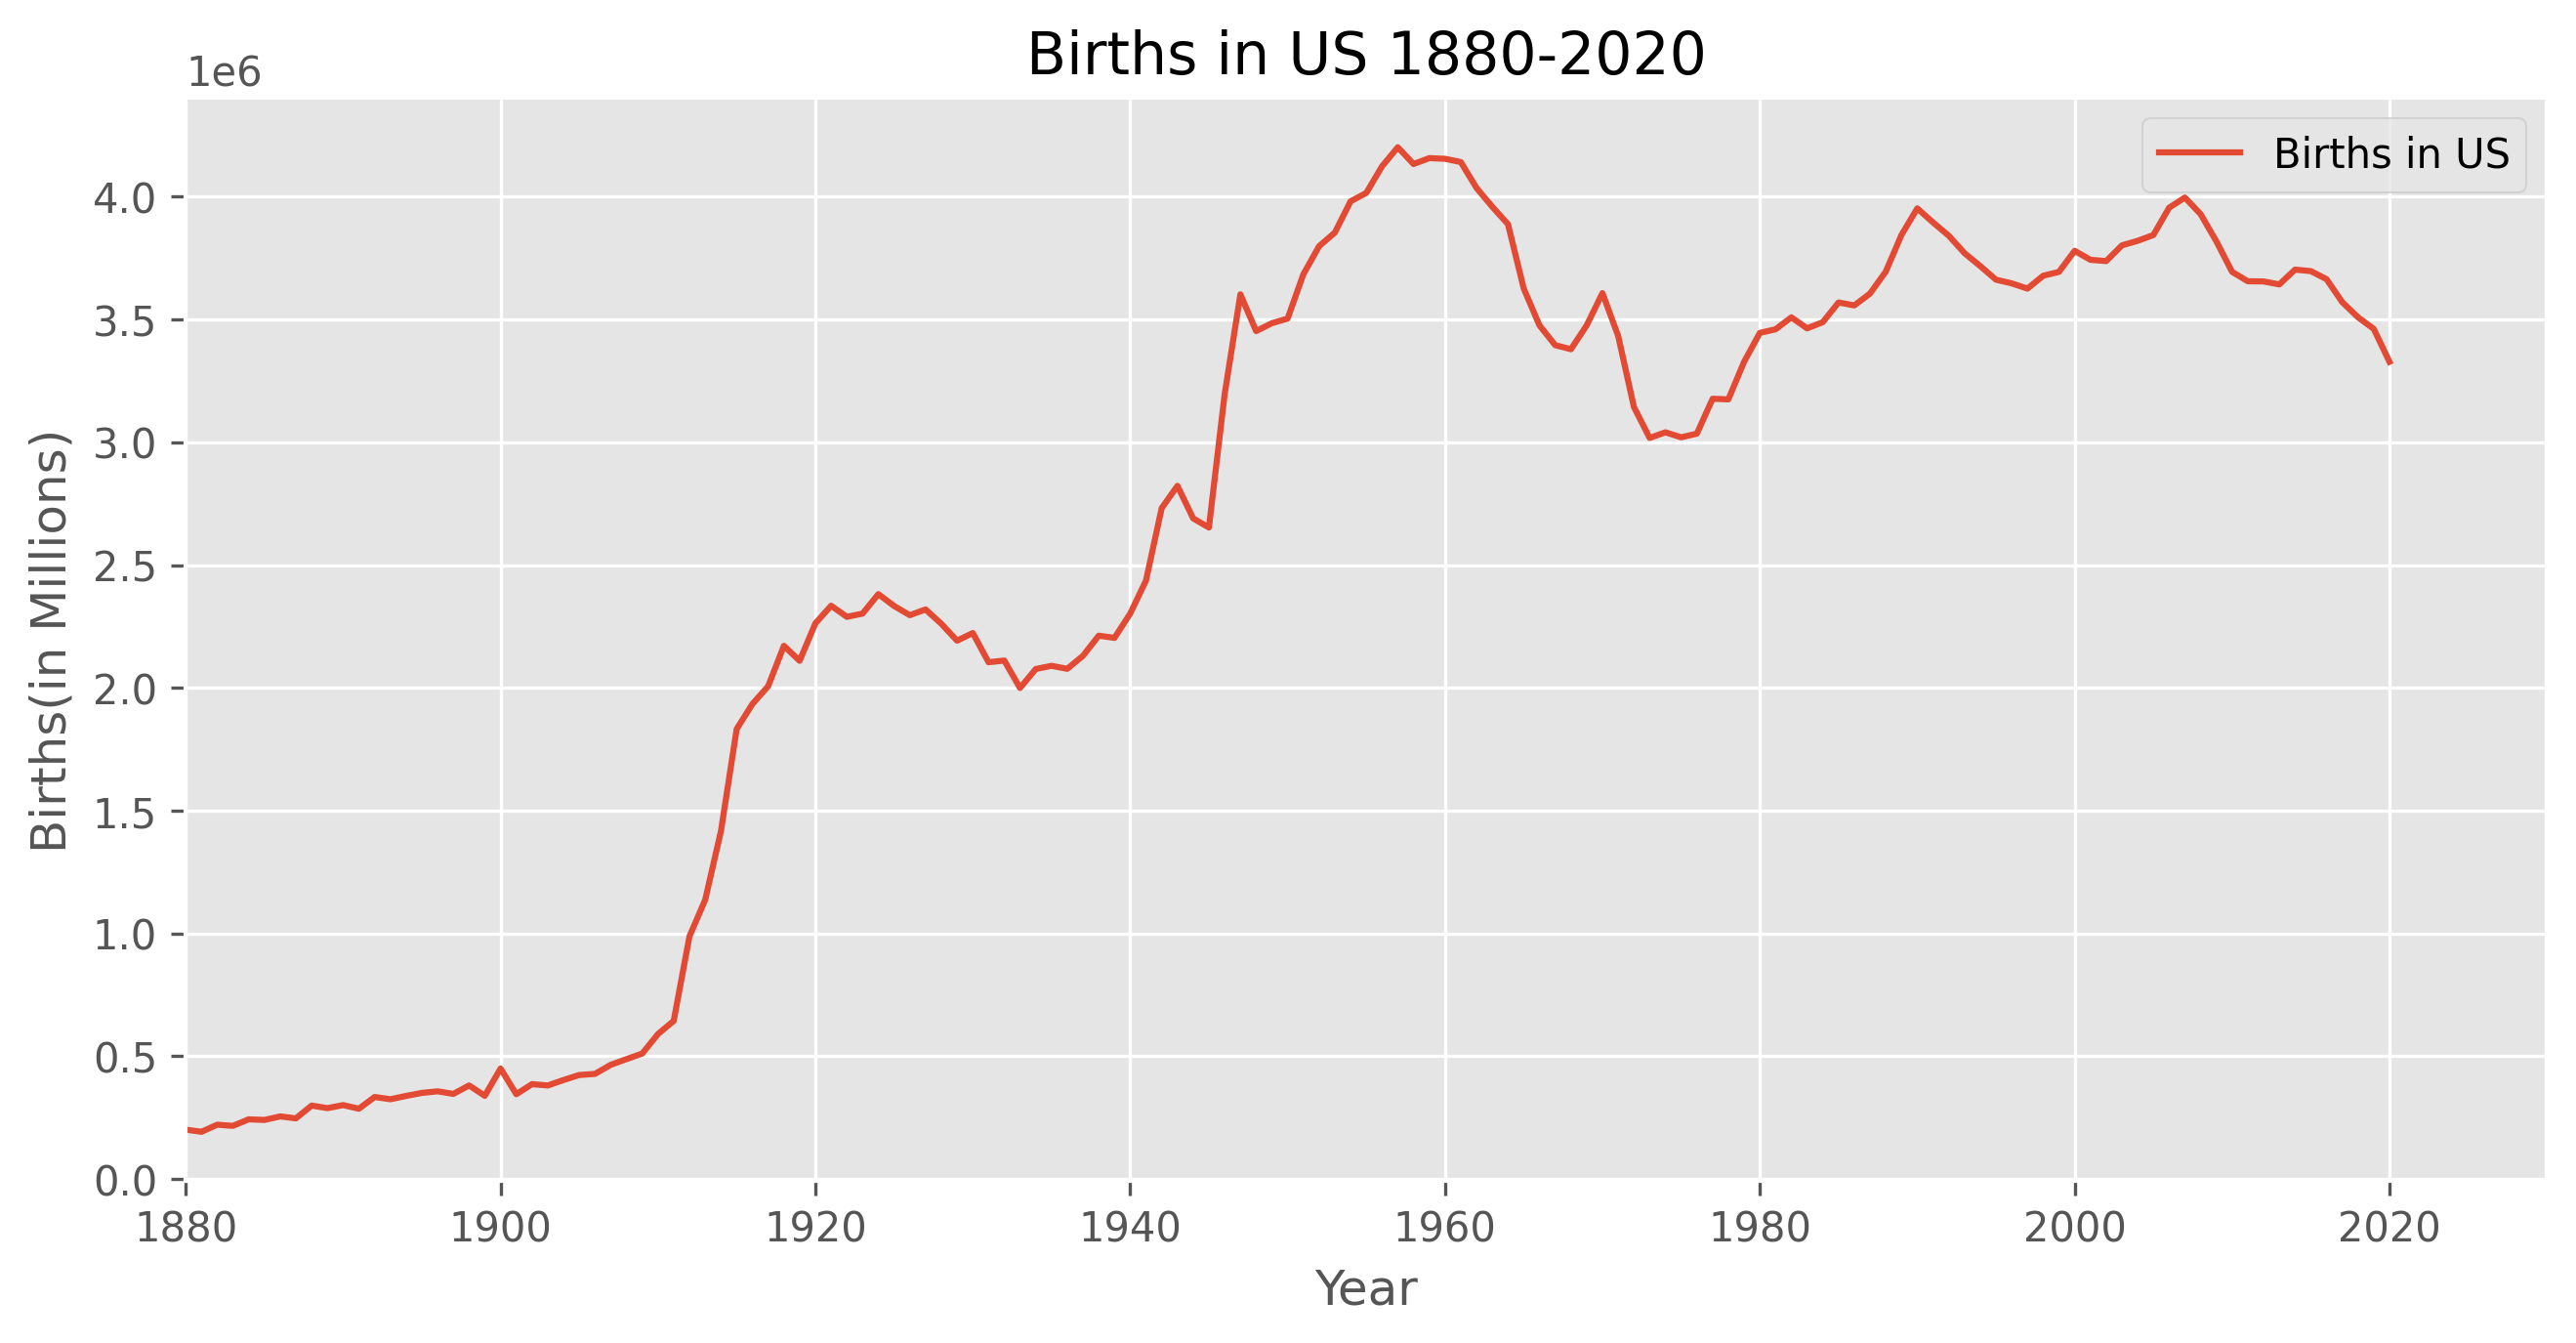

In [45]:
import matplotlib.pyplot as plt
# plotting starts

plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')
plt.figure(figsize=(10.4,4.8))

ax = plt.plot(births_dict.index,births_dict[["total_births"]], label = "Births in US")

#titles
plt.title("Births in US 1880-2020")

#axes labels 
plt.xlabel('Year')
plt.ylabel('Births(in Millions)')


# x-axis range
plt.xlim([1880,2030])

plt.legend()

plt.show();


### Bar plot

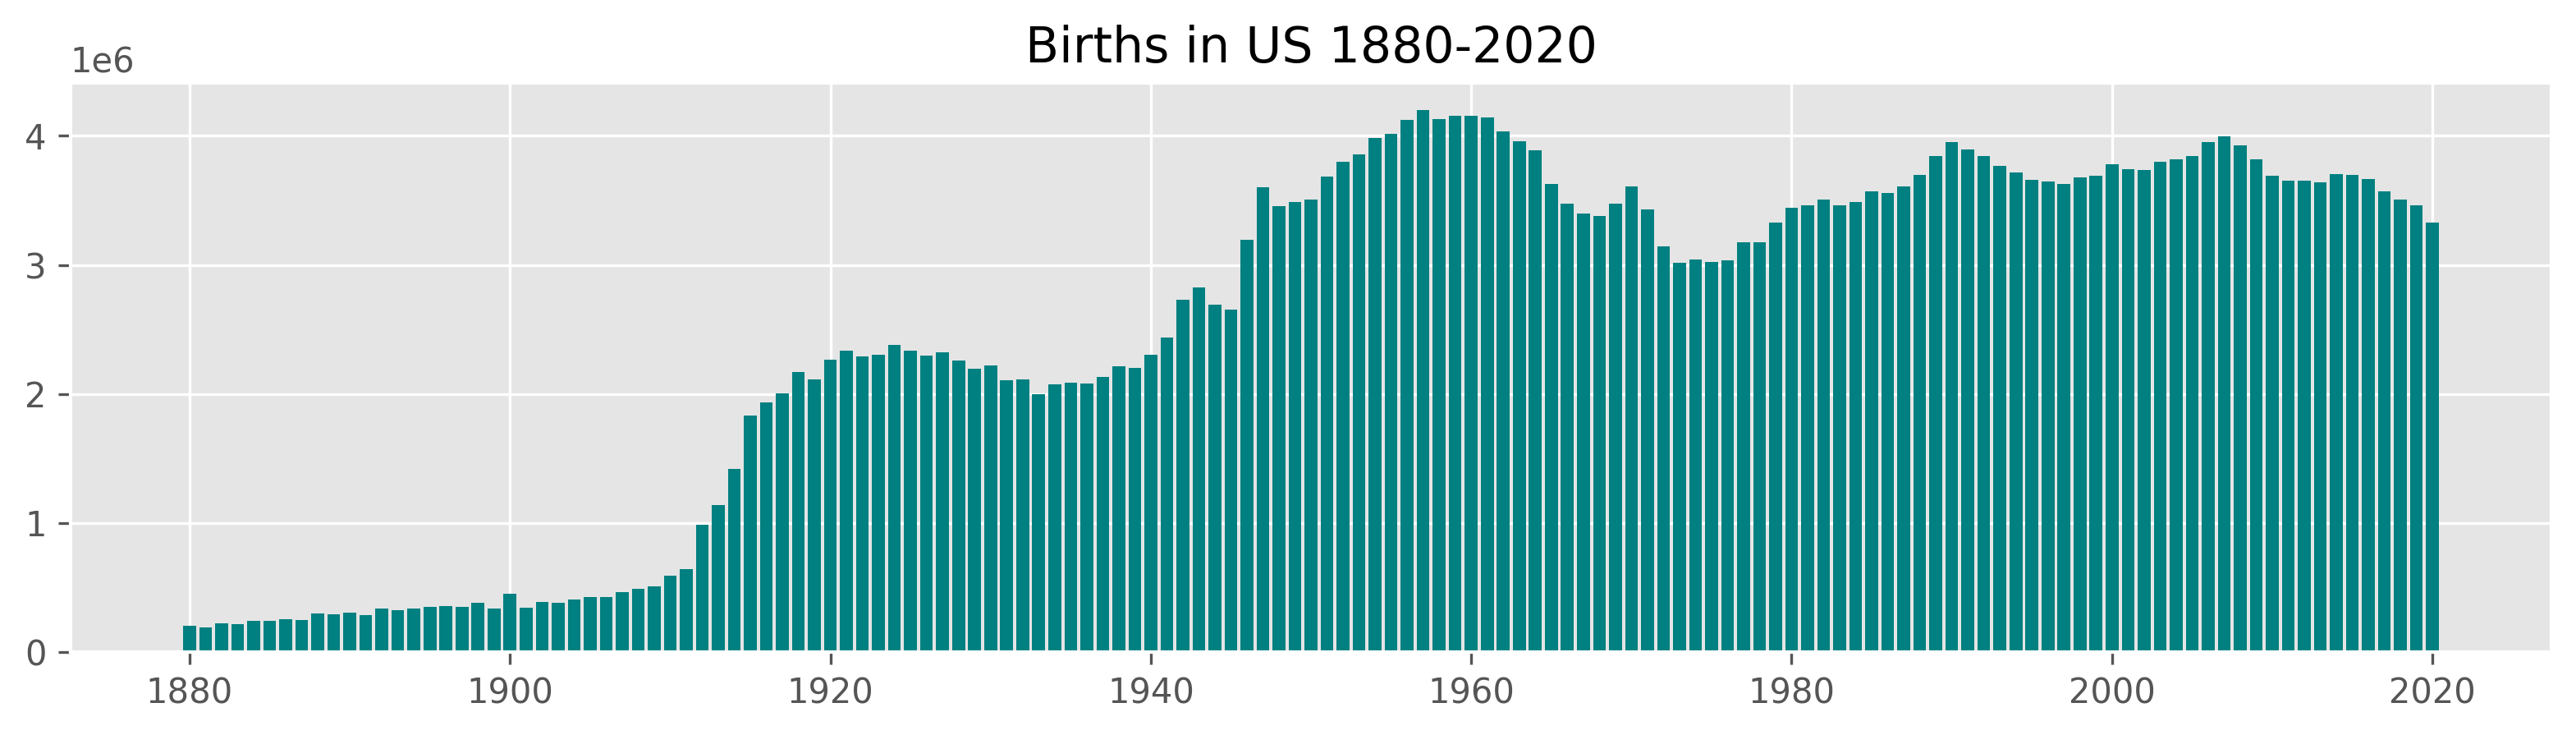

In [46]:
# create a bar plot
plt.figure(figsize=(13, 3))

# using the parameter color
plt.bar(births_dict.index,births_dict["total_births"], color=['teal'])

plt.title("Births in US 1880-2020");

### Histogram on Frequency 

In [47]:
df_1994 = parse_dataset(1994)

df_1994

,Names,Gender,Frequency
0,Jessica,F,32120
1,Ashley,F,30282
2,Emily,F,24151
3,Samantha,F,22824
4,Sarah,F,22293
...,...,...,...
25993,Zedric,M,5
25994,Zef,M,5
25995,Zoey,M,5
25996,Zong,M,5


(array([2.5834e+04, 9.1000e+01, 2.7000e+01, 1.4000e+01, 1.0000e+01,
        1.1000e+01, 6.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e+00, 4.45170e+03, 8.89840e+03, 1.33451e+04, 1.77918e+04,
        2.22385e+04, 2.66852e+04, 3.11319e+04, 3.55786e+04, 4.00253e+04,
        4.44720e+04]),
 <BarContainer object of 10 artists>)

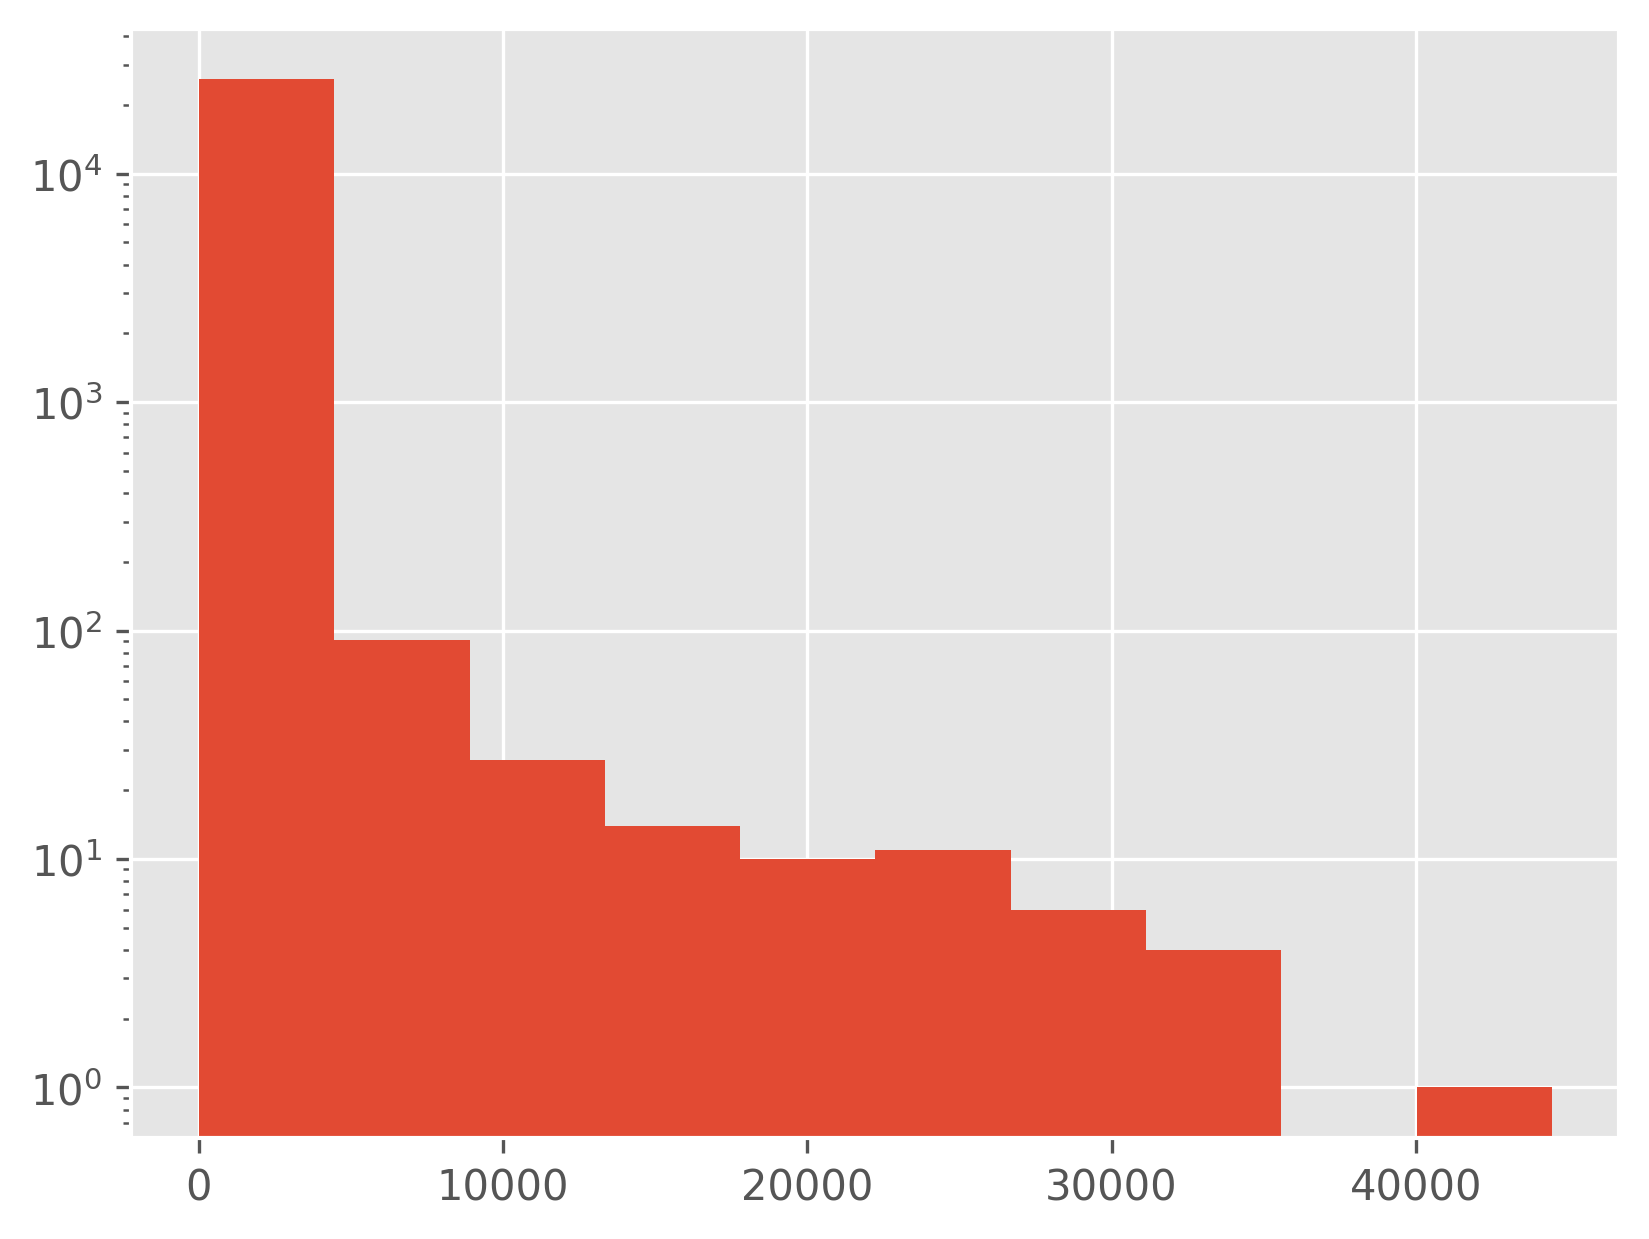

In [48]:
plt.hist(df_1994[["Frequency"]],log=True, bins = 10)


In [49]:
df_2020 = parse_dataset(2020)

df_2020

,Names,Gender,Frequency
0,Olivia,F,17641
1,Emma,F,15656
2,Ava,F,13160
3,Charlotte,F,13065
4,Sophia,F,13036
...,...,...,...
31448,Zykell,M,5
31449,Zylus,M,5
31450,Zymari,M,5
31451,Zyn,M,5


(array([3.1125e+04, 1.8400e+02, 6.3000e+01, 4.0000e+01, 2.2000e+01,
        5.0000e+00, 9.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([5.00000e+00, 1.98220e+03, 3.95940e+03, 5.93660e+03, 7.91380e+03,
        9.89100e+03, 1.18682e+04, 1.38454e+04, 1.58226e+04, 1.77998e+04,
        1.97770e+04]),
 <BarContainer object of 10 artists>)

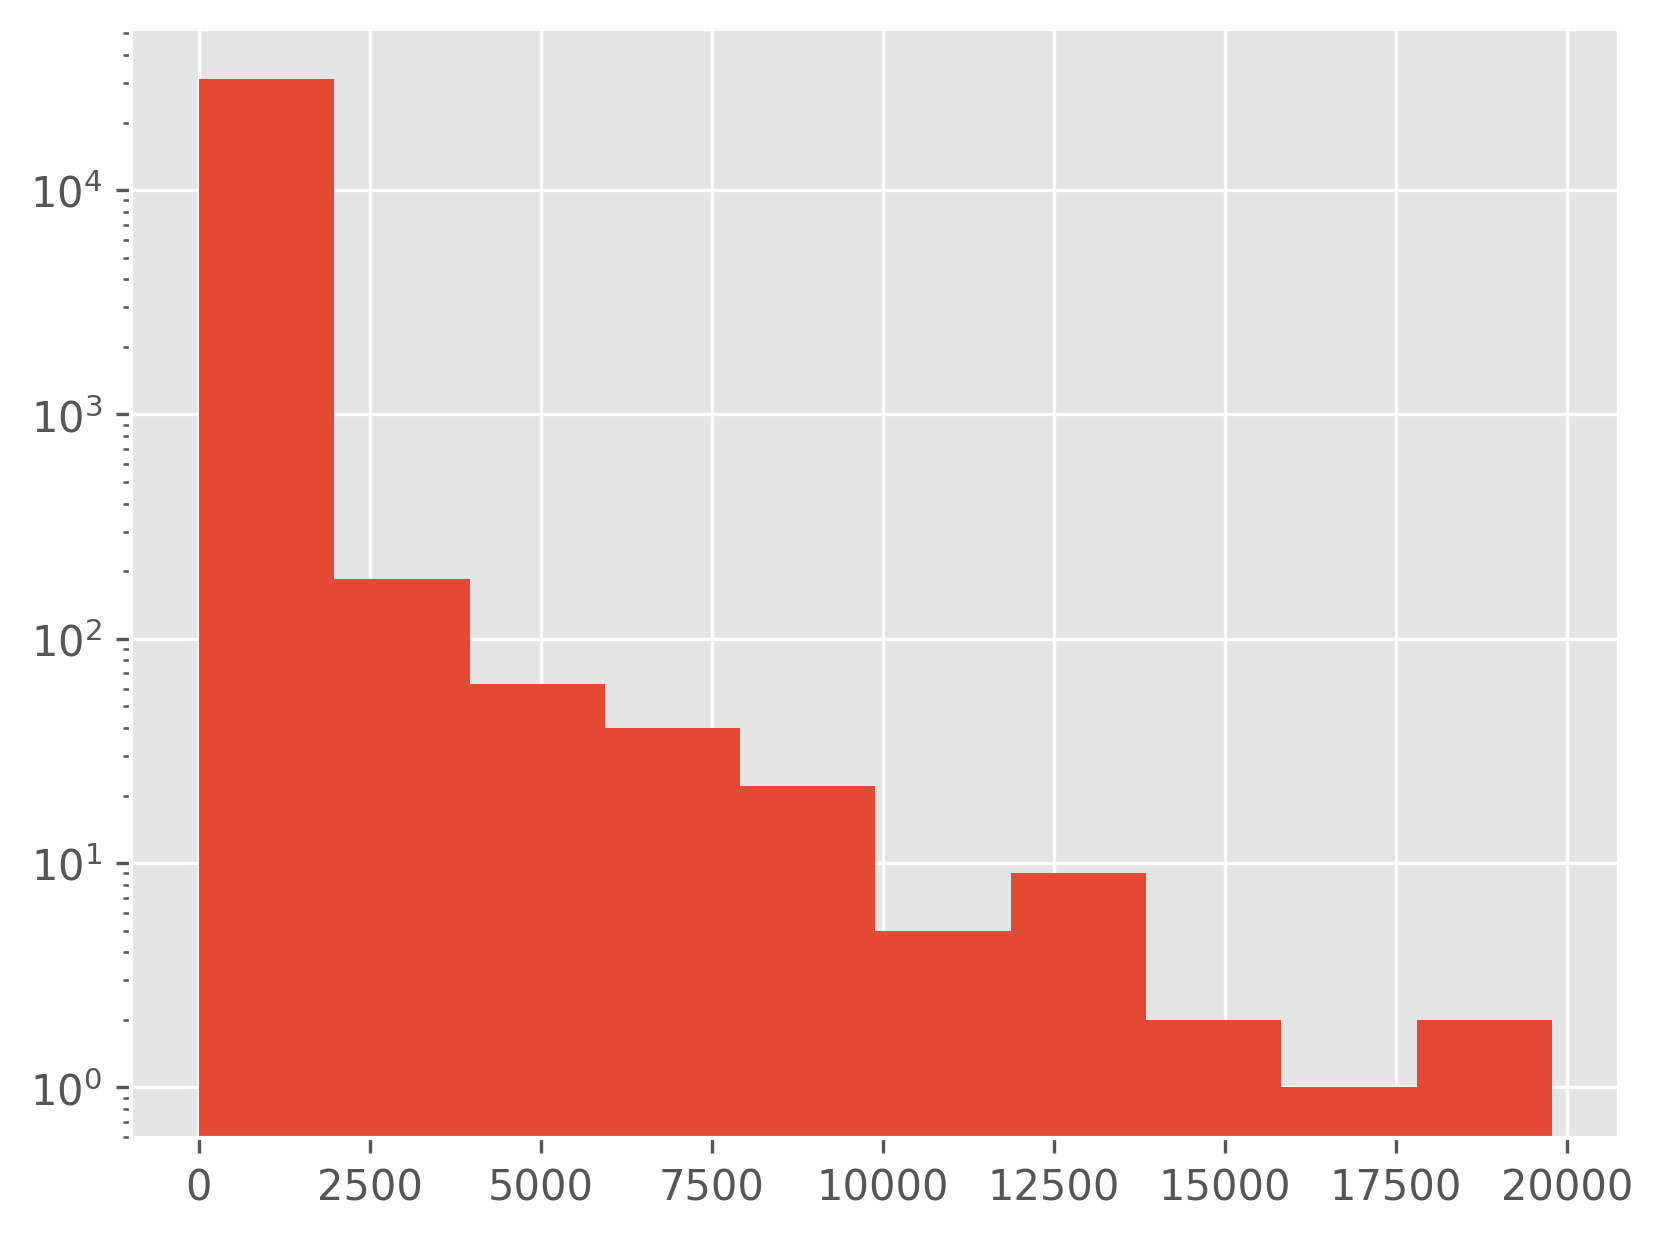

In [50]:
plt.hist(df_2020[["Frequency"]],log=True, bins = 10)


### Number of unique names over time

In [51]:
unique_names = {'year':[], 'unique_names':[]}

for year in range(1880,2021):
    unique_temp = parse_dataset(year)
    unique_name_count = unique_temp["Names"].nunique()
    unique_names['year'].append(year)
    unique_names['unique_names'].append(unique_name_count)

In [52]:
unique_names = pd.DataFrame(unique_names)

unique_names.set_index("year",inplace=True)

unique_names

,unique_names
year,
1880,1889
1881,1829
1882,2012
1883,1962
1884,2158
...,...
2016,30440
2017,30054
2018,29637


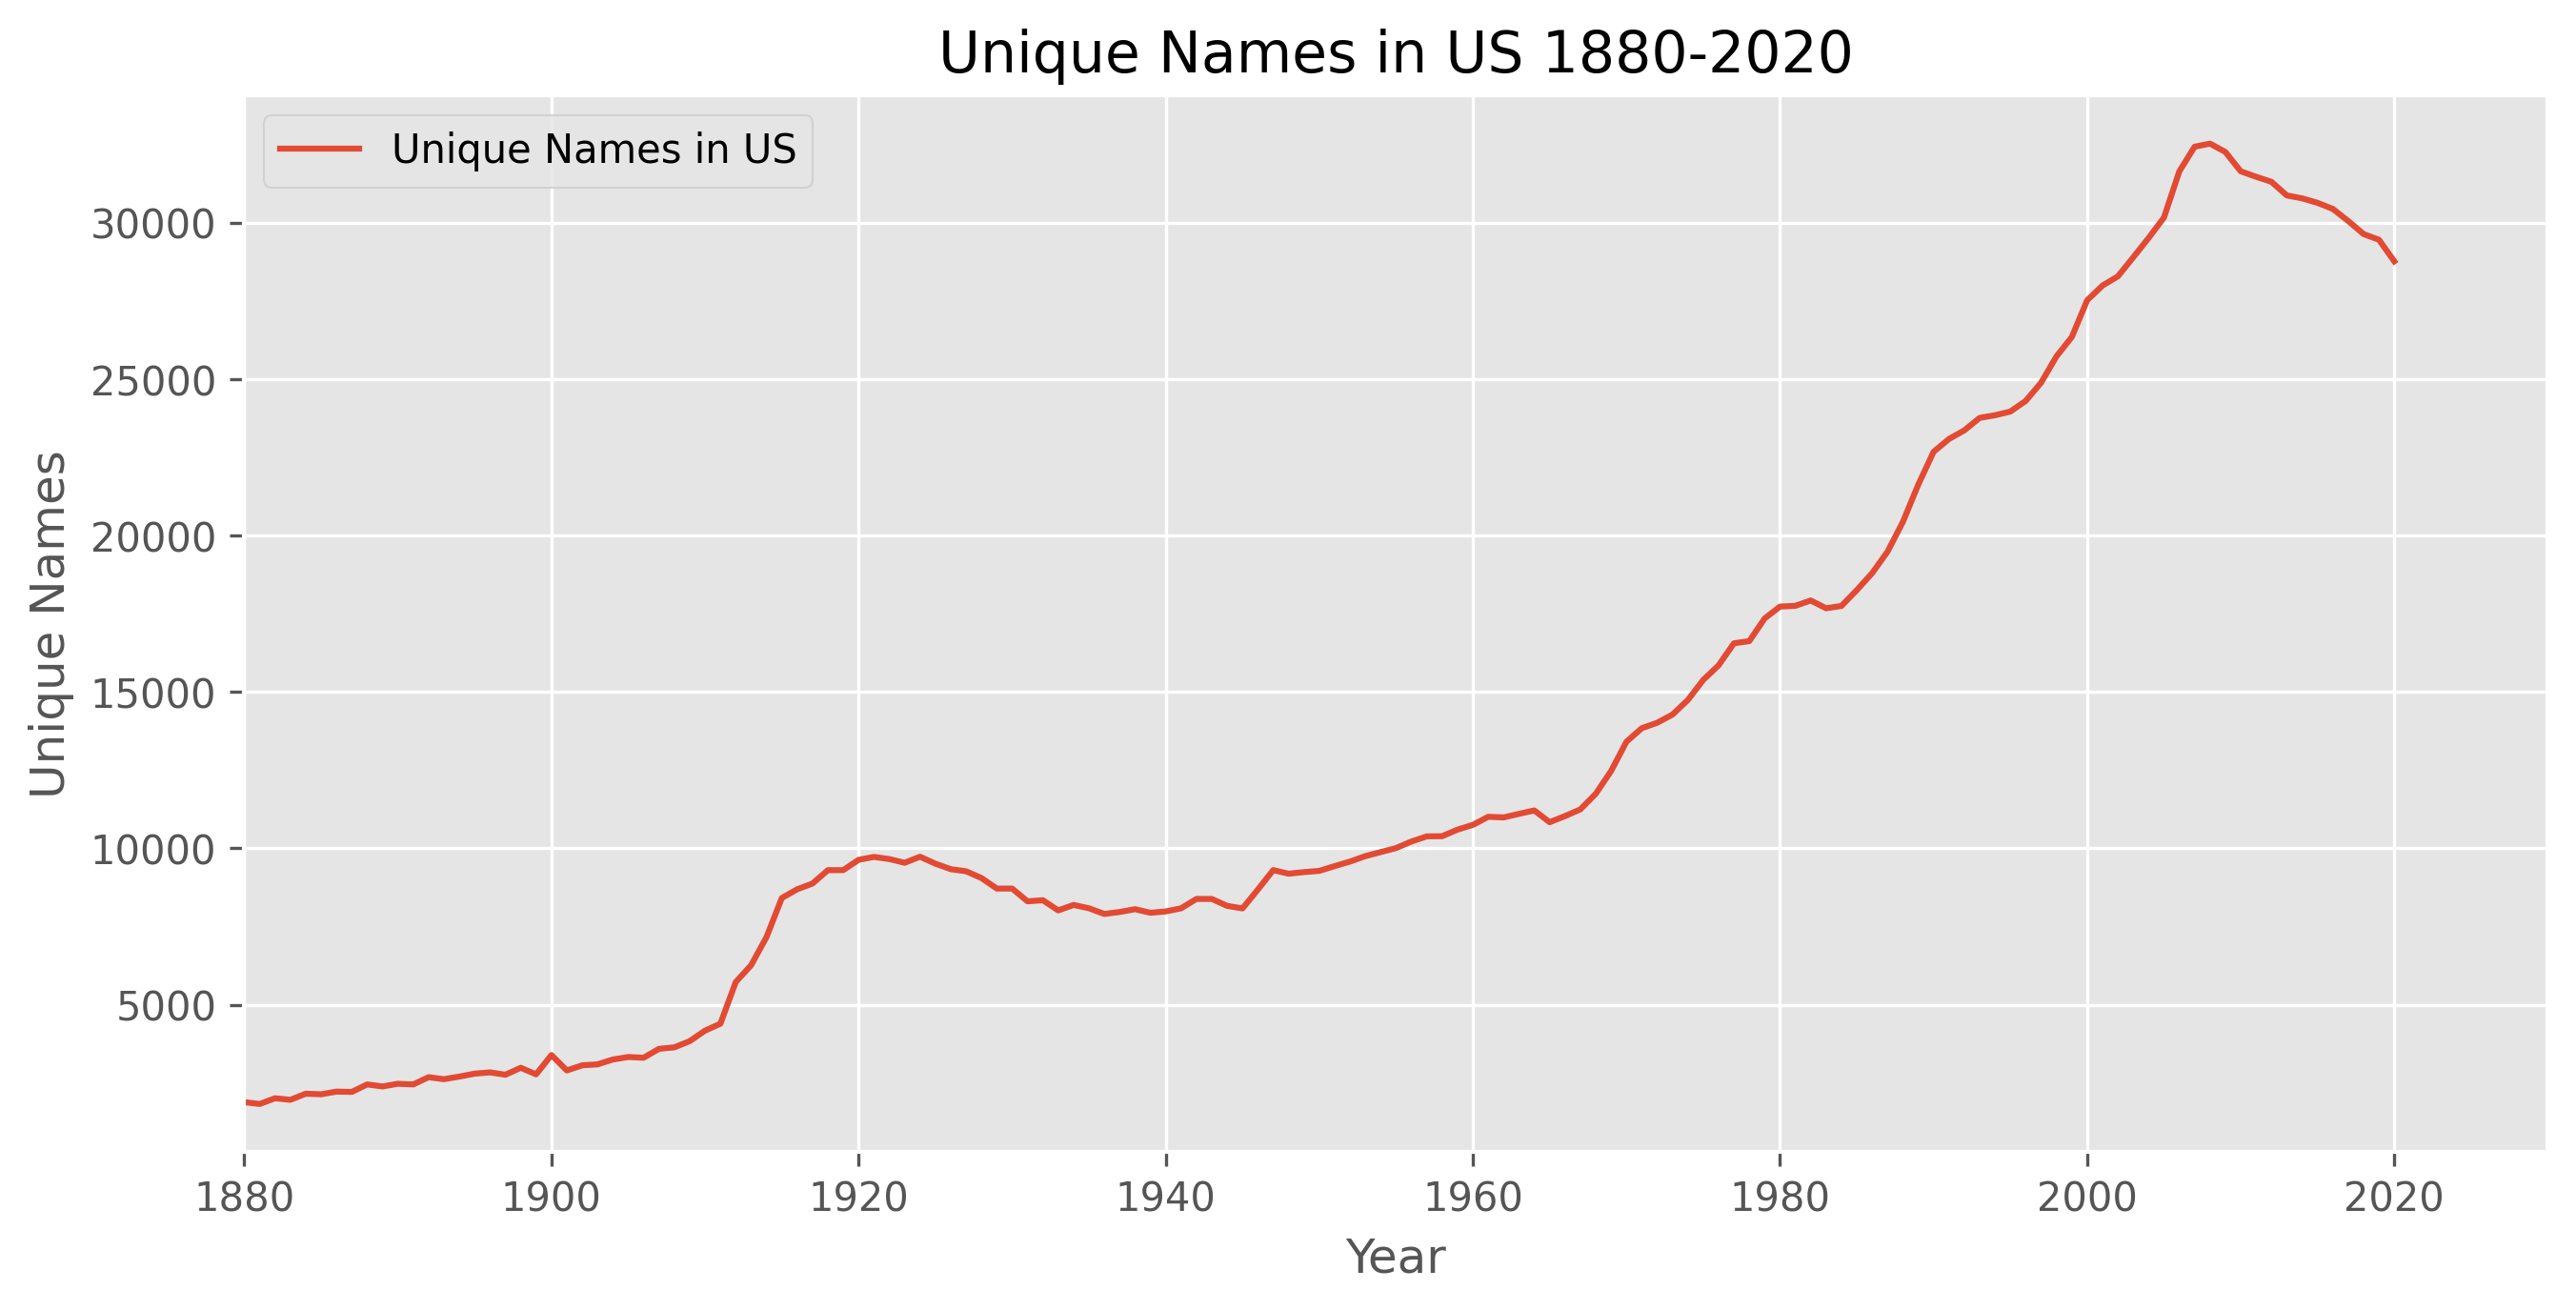

In [53]:

plt.style.use('ggplot')
plt.figure(figsize=(10.4,4.8))

plt.plot(unique_names.index,unique_names[["unique_names"]], label = "Unique Names in US")

#titles
plt.title('Unique Names in US 1880-2020')

#axes labels 
plt.xlabel('Year')
plt.ylabel('Unique Names')


# x-axis range
plt.xlim([1880,2030])

plt.legend();


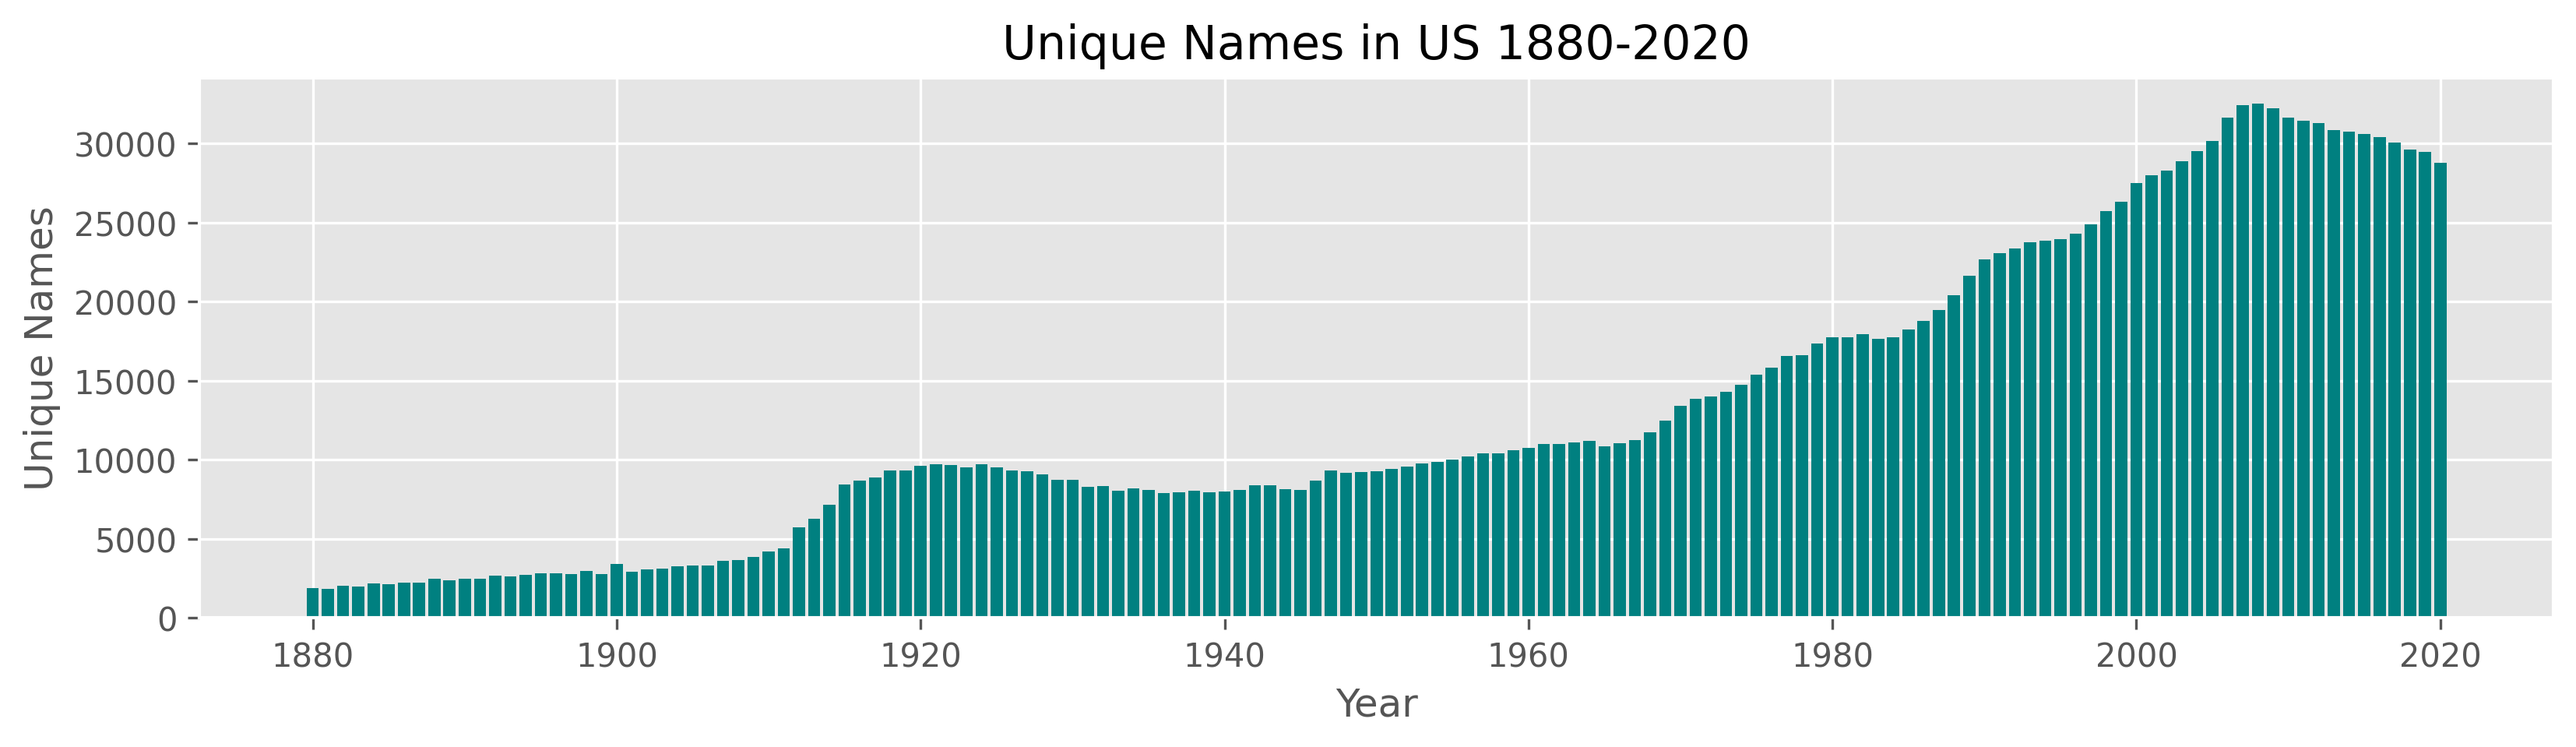

In [54]:
plt.figure(figsize=(13, 3))

# using the parameter color
plt.bar(unique_names.index,unique_names.iloc[:,0], color=['teal']);

plt.xlabel('Year')
plt.ylabel('Unique Names')

plt.title('Unique Names in US 1880-2020');

### Frequency of Emily

In [55]:
df_emily_plot = pd.read_csv("../data/baby_name_emily.csv", index_col=2)

df_emily_plot

,Unnamed: 0,Frequency
Year,,
1880,99,210
1881,2089,244
1882,4028,272
1883,6141,342
1884,8225,364
...,...,...
2016,1859839,10992
2017,1892885,9803
2018,1925533,8700


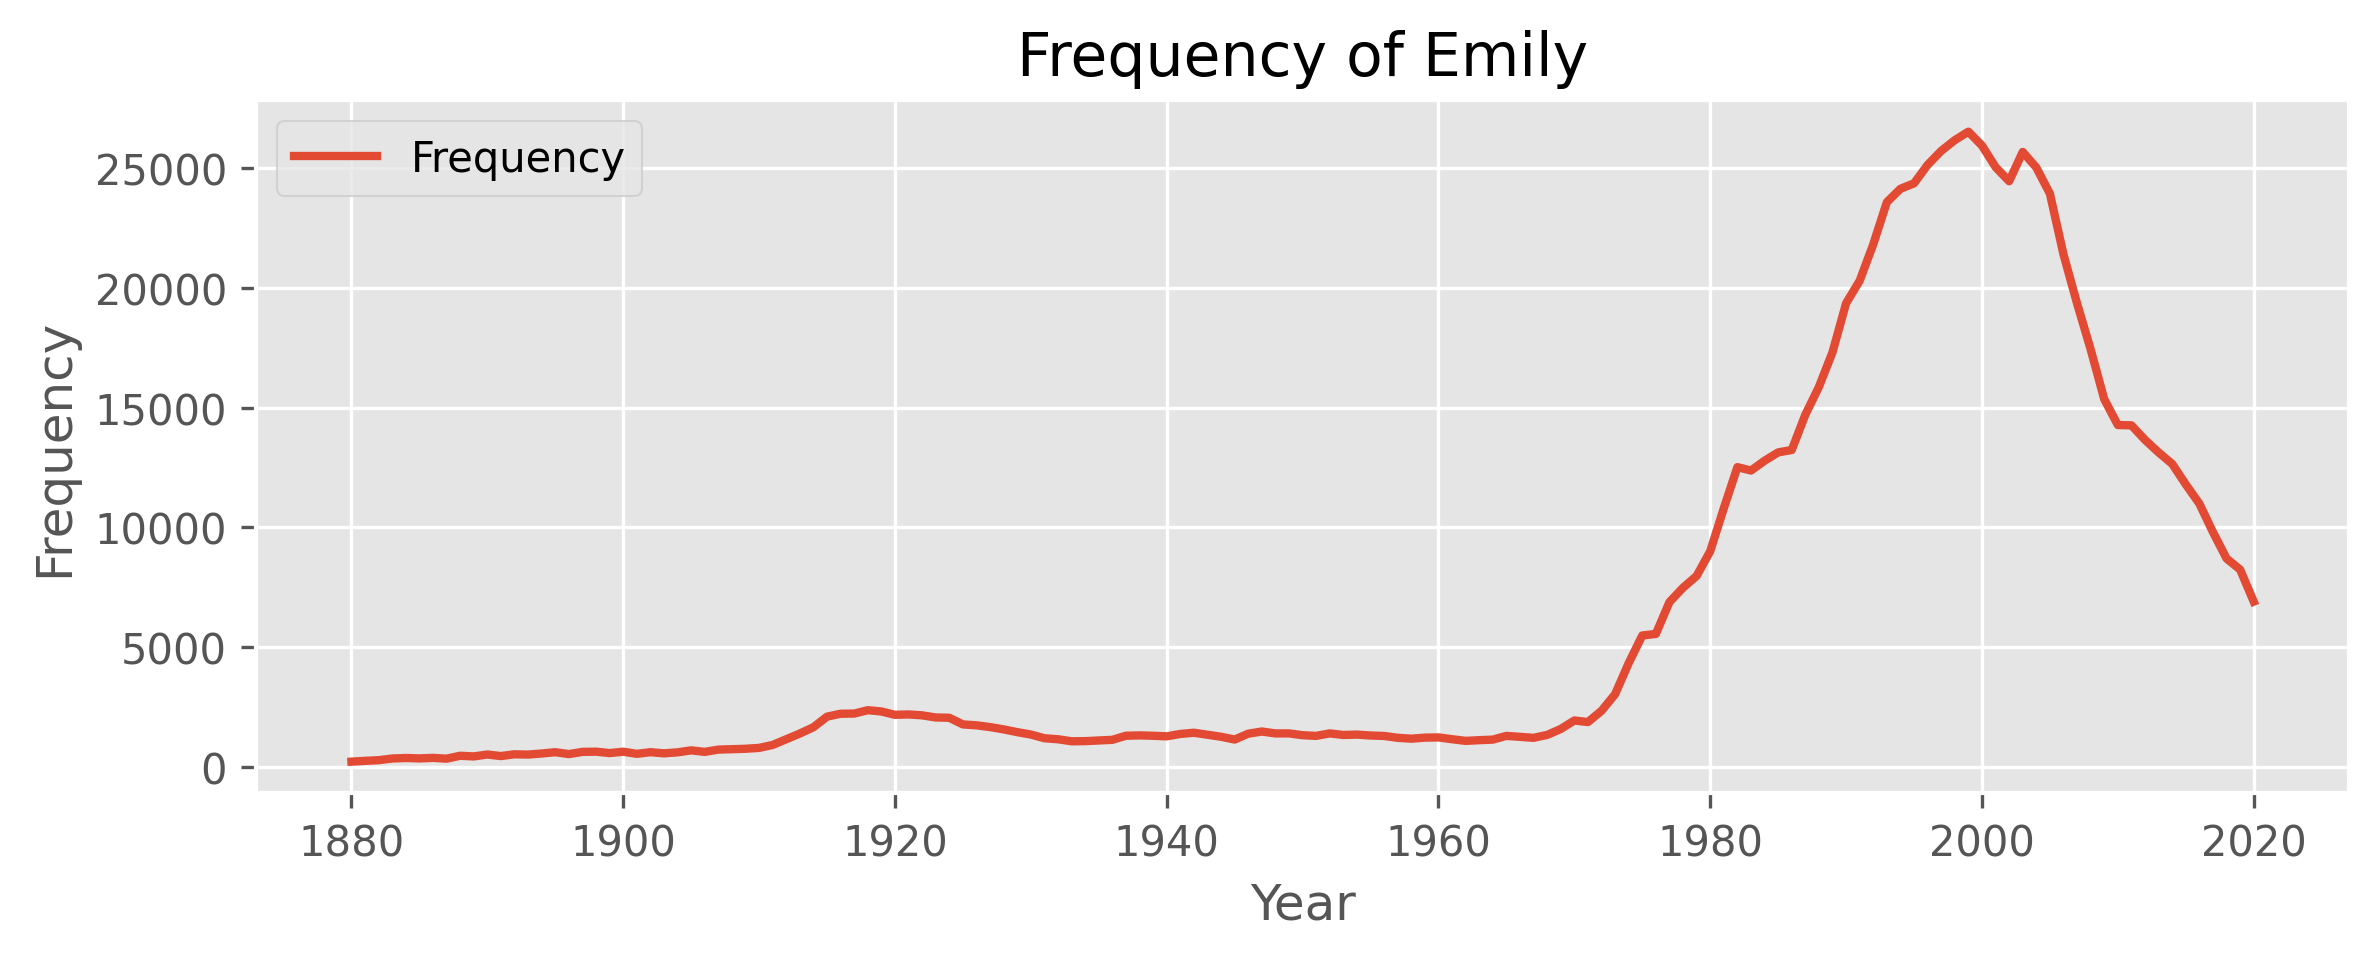

In [56]:
plt.figure(figsize=(9,  3))

plt.plot(df_emily_plot.index, df_emily_plot[["Frequency"]], label='Frequency', linewidth=2)

# title
plt.title('Frequency of Emily')

# axes labels
plt.xlabel('Year')
plt.ylabel('Frequency')


plt.legend();

# plt.savefig('../images/some_random_plot.png')